Vorbereitung:
- Daten herunterladen und in DataFrame laden
- DataFrames zusammenfügen
- Ausgabe DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

wetterdaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/wetter.csv"
wetter = pd.read_csv(wetterdaten_url)

#Gib die Temperaturdaten aus
print(wetter)

#Konvertiere die Spalte "Datum" in einen Datumsdatentypen 
wetter["Datum"] = pd.to_datetime(wetter["Datum"])

print(wetter)

           Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0     2012-01-01         8.0      9.8250                   14        58.0
1     2012-01-02         7.0      7.4375                   12         NaN
2     2012-01-03         8.0      5.5375                   18        63.0
3     2012-01-04         4.0      5.6875                   19        80.0
4     2012-01-05         6.0      5.3000                   23        80.0
...          ...         ...         ...                  ...         ...
2596  2019-07-28         3.0     23.3500                   14         5.0
2597  2019-07-29         6.0     25.2500                    7        61.0
2598  2019-07-30         7.0     20.7375                    8        61.0
2599  2019-07-31         6.0     20.4500                    7        61.0
2600  2019-08-01         5.0     21.0625                    9        61.0

[2601 rows x 5 columns]
          Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0    2012-01-0

# Deskriptive Statistik:

## Erste Dateninspektion

In [2]:
print(wetter.describe())

print(wetter.isnull())

                               Datum   Bewoelkung   Temperatur  \
count                           2601  2591.000000  2601.000000   
mean   2015-12-07 00:08:18.269896192     4.805866    12.099586   
min              2012-01-01 00:00:00     0.000000   -10.250000   
25%              2014-03-14 00:00:00     3.000000     6.512500   
50%              2015-12-24 00:00:00     6.000000    12.000000   
75%              2017-10-07 00:00:00     7.000000    17.825000   
max              2019-08-01 00:00:00     8.000000    32.671428   
std                              NaN     2.578299     7.174357   

       Windgeschwindigkeit   Wettercode  
count          2601.000000  1932.000000  
mean             11.191080    37.484472  
min               3.000000     0.000000  
25%               8.000000    10.000000  
50%              10.000000    28.000000  
75%              14.000000    61.000000  
max              35.000000    95.000000  
std               4.124693    27.567144  
      Datum  Bewoelkung  Te

## Durchschnitt / Ausreißer

In [3]:
# Konvertiere das Datum in den Index
wetter.set_index('Datum', inplace=True)

# Deskriptive Statistiken berechnen
deskriptive_statistiken = wetter.describe()
print("Deskriptive Statistiken:")
print(deskriptive_statistiken)

mittelwert = wetter.mean()
median = wetter.median()
modus = wetter.mode()
varianz = wetter.var()
minimum = wetter.min()
maximum = wetter.max()
q1 = wetter.quantile(0.25)
q3 = wetter.quantile(0.75)
iqr = q3 - q1

print("\nWeitere Statistiken:")
print(f"Mittelwert:\n{mittelwert}")
print(f"Median:\n{median}")
print(f"Modus:\n{modus}")
print(f"Varianz:\n{varianz}")
print(f"Minimum:\n{minimum}")
print(f"Maximum:\n{maximum}")
print(f"1. Quartil (Q1):\n{q1}")
print(f"3. Quartil (Q3):\n{q3}")
print(f"Interquartilsabstand (IQR):\n{iqr}")


Deskriptive Statistiken:
        Bewoelkung   Temperatur  Windgeschwindigkeit   Wettercode
count  2591.000000  2601.000000          2601.000000  1932.000000
mean      4.805866    12.099586            11.191080    37.484472
std       2.578299     7.174357             4.124693    27.567144
min       0.000000   -10.250000             3.000000     0.000000
25%       3.000000     6.512500             8.000000    10.000000
50%       6.000000    12.000000            10.000000    28.000000
75%       7.000000    17.825000            14.000000    61.000000
max       8.000000    32.671428            35.000000    95.000000

Weitere Statistiken:
Mittelwert:
Bewoelkung              4.805866
Temperatur             12.099586
Windgeschwindigkeit    11.191080
Wettercode             37.484472
dtype: float64
Median:
Bewoelkung              6.0
Temperatur             12.0
Windgeschwindigkeit    10.0
Wettercode             28.0
dtype: float64
Modus:
   Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode

## Histogramm

### Histogramm Temperatur / Bewölkung

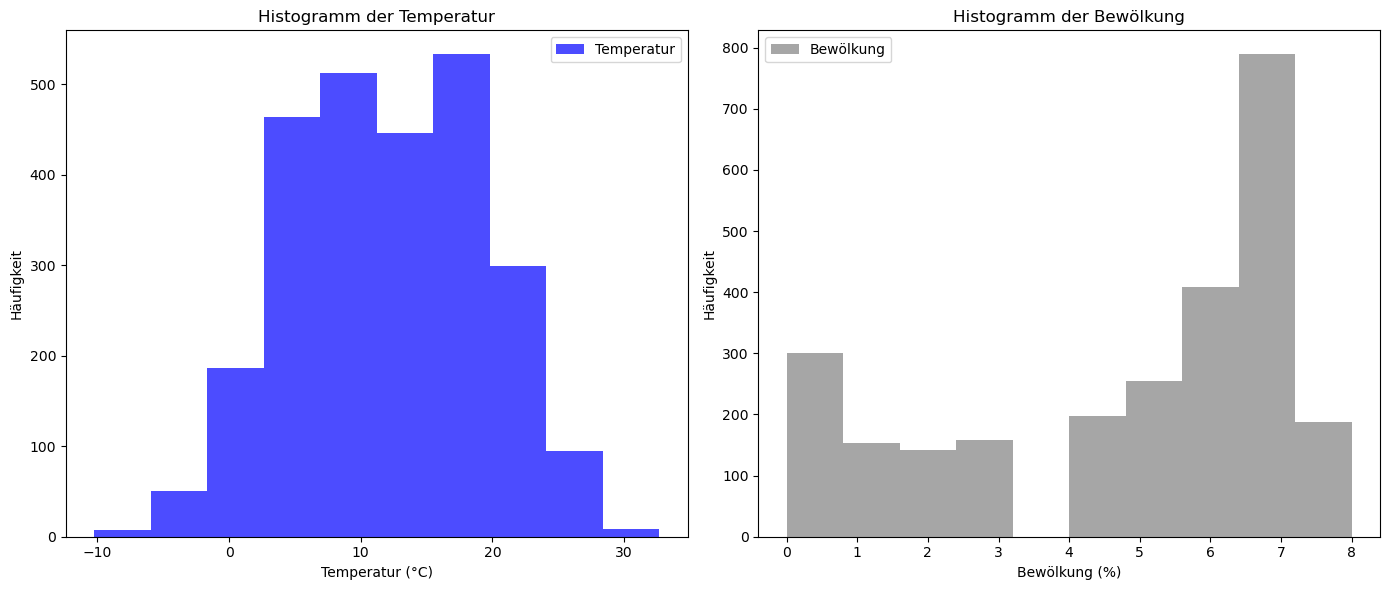

In [4]:
# Histogramm erstellen
plt.figure(figsize=(14, 6))

# Histogramm für die Temperatur
plt.subplot(1, 2, 1)
plt.hist(wetter['Temperatur'], bins=10, color='blue', alpha=0.7, label='Temperatur')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Temperatur')
plt.legend()

# Histogramm für die Bewölkung
plt.subplot(1, 2, 2)
plt.hist(wetter['Bewoelkung'], bins=10, color='gray', alpha=0.7, label='Bewölkung')
plt.xlabel('Bewölkung (%)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Bewölkung')
plt.legend()

plt.tight_layout()
plt.show()

### Histogramm der Häufigkeiten

Häufigkeit der Temperaturwerte:
Temperatur
-10.250000    1
-8.475000     1
-7.712500     1
-7.537500     1
-7.037500     1
             ..
 28.875000    1
 29.725000    1
 31.287500    1
 31.437500    1
 32.671428    1
Name: count, Length: 1230, dtype: int64

Häufigkeit der Bewölkungswerte:
Bewoelkung
0.0    300
1.0    153
2.0    142
3.0    159
4.0    197
5.0    255
6.0    408
7.0    789
8.0    188
Name: count, dtype: int64


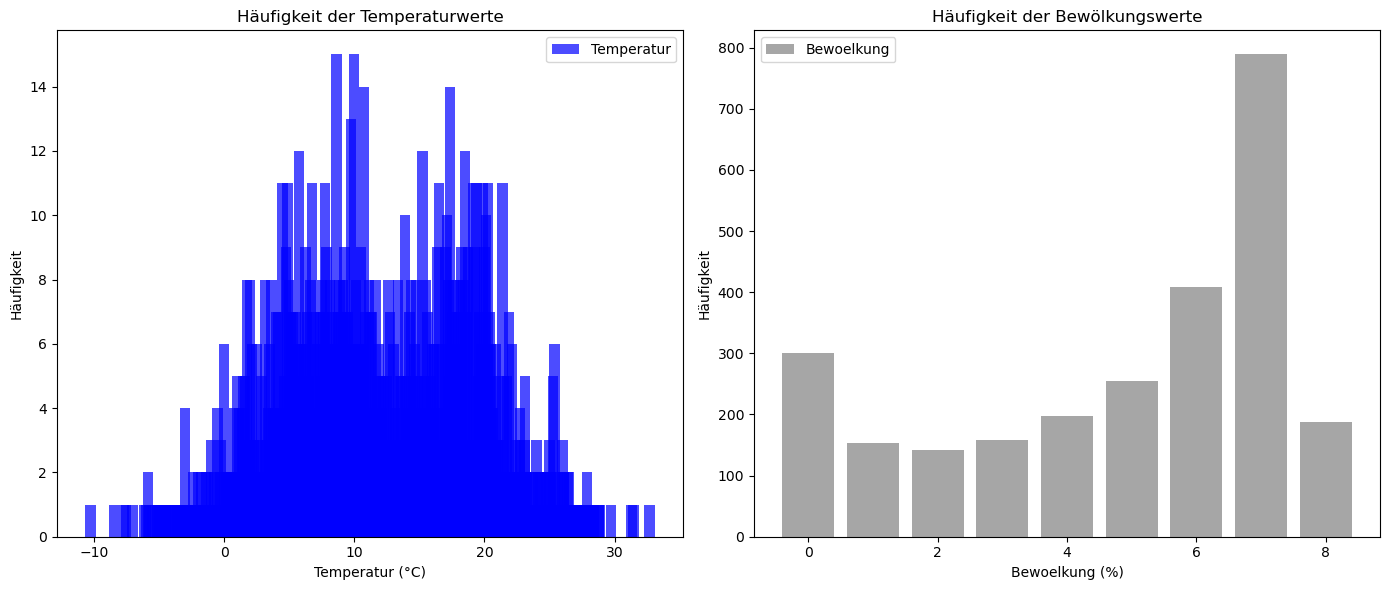

In [5]:
# Häufigkeit der Temperaturwerte berechnen
temp_counts = wetter['Temperatur'].value_counts().sort_index()

# Häufigkeit der Bewölkungswerte berechnen
bewolkung_counts = wetter['Bewoelkung'].value_counts().sort_index()

# Häufigkeitstabellen ausgeben
print("Häufigkeit der Temperaturwerte:")
print(temp_counts)
print("\nHäufigkeit der Bewölkungswerte:")
print(bewolkung_counts)

# Histogramme erstellen
plt.figure(figsize=(14, 6))

# Histogramm für die Temperatur
plt.subplot(1, 2, 1)
plt.bar(temp_counts.index, temp_counts.values, color='blue', alpha=0.7, label='Temperatur')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeit der Temperaturwerte')
plt.legend()

# Histogramm für die Bewölkung
plt.subplot(1, 2, 2)
plt.bar(bewolkung_counts.index, bewolkung_counts.values, color='gray', alpha=0.7, label='Bewoelkung')
plt.xlabel('Bewoelkung (%)')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeit der Bewölkungswerte')
plt.legend()

plt.tight_layout()
plt.show()